# Assignment 8: Implement a Neural Network for Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

In this assignment, you will implement a feedforward neural network that performs sentiment classification.
You will complete the following tasks:
    
1. Build your DataFrame and define your ML problem:
    * Load the book review data set
    * Define the label - what are you predicting?
    * Identify the features
2. Create labeled examples from the data set
3. Split the data into training and test data sets
4. Transform the training and test text data using a TF-IDF vectorizer. 
5. Construct a neural network
6. Train the neural network
7. Compare the neural network model's performance on the training and validation data.
8. Improve the model's generalization performance.
9. Evaluate the model's performance on the test data.
10. Experiment with ways to improve the model.

For this assignment, use the demo <i>Transforming Text into Features for Sentiment Analysis</i> that is contained in this unit as a reference.

**<font color='red'>Note: some of the code cells in this notebook may take a while to run</font>**

## Part 1. Build Your DataFrame and Define Your ML Problem


#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the book review data set that contains book reviews taken from Amazon.com reviews.

<b>Task</b>: In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`.

You will be working with the file named "bookReviews.csv" that is located in a folder named "data_NLP".

In [2]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data_NLP", "bookReviews.csv")
df = pd.read_csv(filename)

#### Inspect the Data

<b>Task</b>: In the code cell below, inspect the data in DataFrame `df` by printing the number of rows and columns, the column names, and the first ten rows. You may perform any other techniques you'd like to inspect the data.

In [3]:
# YOUR CODE HERE
print('number of rows:', df.shape[0])
print('number of columns:', df.shape[1])
print('column names:', df.columns)
print('first ten rows:')
df.head(10)

number of rows: 1973
number of columns: 2
column names: Index(['Review', 'Positive Review'], dtype='object')
first ten rows:


,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


#### Define the Label

This is a binary classification problem in which we will predict whether a book review is a positive or negative one. The label is the `Positive Review` column.

#### Identify Features

We only have one feature. The feature is the `Review` column.


## Part 2. Create Labeled Examples from the Data Set 

<b>Task</b>: In the code cell below, create labeled examples from DataFrame `df`. Assign the label to the variable `y`. Assign the feature to the variable `X`. 

In [4]:
# YOUR CODE HERE
y = df['Positive Review']
X = df['Review']

## Part 3. Create Training and Test Data Sets

<b>Task</b>: In the code cell below, create training and test sets out of the labeled examples. Create a test set that is 25 percent of the size of the data set. Save the results to variables `X_train, X_test, y_train, y_test`.


In [5]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

## Part 4:  Implement TF-IDF Vectorizer to Transform Text


In the code cell below, you will transform the features into numerical vectors using `TfidfVectorizer`. 


<b>Task:</b> Follow the steps to complete the code in the cell below:

1. Create a `TfidfVectorizer` object and save it to the variable `tfidf_vectorizer`.

2. Call `tfidf_vectorizer.fit()` to fit the vectorizer to the training data `X_train`.

3. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the training data `X_train`. Save the result to `X_train_tfidf`.

4. Call the `tfidf_vectorizer.transform()` method to use the fitted vectorizer to transform the test data `X_test`. Save the result to `X_test_tfidf`.

In [6]:
# 1. Create a TfidfVectorizer object 
# YOUR CODE HERE
tfidf_vectorizer = TfidfVectorizer(min_df = 3, ngram_range=(1,2))

# 2. Fit the vectorizer to X_train
# YOUR CODE HERE
tfidf_vectorizer.fit(X_train)

# 3. Using the fitted vectorizer, transform the training data 
# YOUR CODE HERE
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# 4. Using the fitted vectorizer, transform the test data 
# YOUR CODE HERE
X_test_tfidf = tfidf_vectorizer.transform(X_test)

When constructing our neural network, we will have to specify the `input_shape`, meaning the dimensionality of the input layer. This corresponds to the dimension of each of the training examples, which in our case is our vocabulary size. Run the code cell below to see the vocabulary size.


In [7]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_) #vocaulbary_ is the vocabulary attribute

print(vocabulary_size)

17684


## Part 5: Construct a Neural Network


### Step 1.  Define Model Structure

Next we will create our neural network structure. We will create an input layer, three hidden layers and an output layer:

* <b>Input layer</b>: The input layer will have the input shape corresponding to the vocabulary size. 
* <b>Hidden layers</b>: We will create three hidden layers, with 64, 32, and 16 units (number of nodes) respectively. Each layer will utilize the ReLU activation function. 
* <b>Output layer</b>: The output layer will have 1 unit. The output layer will utilize the sigmoid activation function. Since we are working with binary classification, we will be using the sigmoid activation function to map the output to a probability between 0.0 and 1.0. We can later set a threshold and assume that the prediction is class 1 if the probability is larger than or equal to our threshold, or class 0 if it is lower than our threshold.

Use the same approach you have taken in this course to construct a feedforward neural network model using Keras. Do the following:

* Use the Keras [`Sequential` class](https://keras.io/api/models/sequential/#sequential-class) to group a stack of layers. This will be our neural network model object. Name your neural network model object ```nn_model```.    
* Use the [`InputLayer` class](https://www.tensorflow.org/api_docs/python/tf/keras/layers/InputLayer) to create the input layer. 
* Use the [`Dense` class](https://keras.io/api/layers/core_layers/dense/) to create each hidden layer and the output layer.
* After creating each layer, add it to the neural network model object ```nn_model```.


In [8]:
# 1. Create model object
# YOUR CODE HERE
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
# YOUR CODE HERE
input_layer = keras.layers.InputLayer(input_shape = len(tfidf_vectorizer.vocabulary_))
nn_model.add(input_layer)

#added layers
#hidden_layer_0 = keras.layers.Dense(units = 128, activation = 'relu')
#nn_model.add(hidden_layer_0)

# 3. Create the first hidden layer and add it to the model object:
# YOUR CODE HERE
hidden_layer_1 = keras.layers.Dense(units = 64, activation = 'relu')
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.25))

# 4. Create the second layer and add it to the model object:
# YOUR CODE HERE
hidden_layer_2 = keras.layers.Dense(units = 32, activation = 'relu')
nn_model.add(hidden_layer_2)

# 5. Create the third layer and add it to the model object:
# YOUR CODE HERE
hidden_layer_3 = keras.layers.Dense(units = 16, activation = 'relu')
nn_model.add(hidden_layer_3)

# 6. Create the output layer and add it to the model object:
# YOUR CODE HERE
output_layer = keras.layers.Dense(units = 1, activation = 'sigmoid')
nn_model.add(output_layer)

# Print summary of neural network model structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1131840   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,134,465
Trainable params: 1,134,465
Non-trainable params: 0
_________________________________________________________________


### Step 2. Define the Optimization Function

<b>Task:</b> In the code cell below, create a stochastic gradient descent optimizer using  `keras.optimizers.SGD()`. Specify a learning rate of 0.1. Assign the result to the variable`sgd_optimizer`.

In [9]:
# YOUR CODE HERE
sgd_optimizer = keras.optimizers.SGD(learning_rate = 0.1)

### Step 3. Define the Loss Function

<b>Task:</b> In the code cell below, create a binary cross entropy loss function using `keras.losses.BinaryCrossentropy()`. Since our output will be a normalized probability between 0 and 1, specify that `from_logits` is `False`. Assign the result to the variable  `loss_fn`.

In [10]:
# YOUR CODE HERE
loss_fn = keras.losses.BinaryCrossentropy(from_logits = False)

### Step 4. Compile the Model

<b>Task:</b> In the code cell below, package the network architecture with the optimizer and the loss function using the `nn_model.compile()` method. Specify the optimizer, loss function and the accuracy evaluation metric as arguments.

In [11]:
# YOUR CODE HERE
nn_model.compile(optimizer = sgd_optimizer, loss = loss_fn, metrics = ['accuracy'])

## Part 6. Fit the Model on the Training Data

We will define our own callback class to output information from our model while it is training. Make sure you execute the code cell below so that it can be used in subsequent cells.

In [12]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


<b>Task:</b> In the code cell below, fit the neural network model to the vectorized training data. Call the `fit()` method on the model object `nn_model` and specify the following arguments:

1. The training data `X_train_tfidf` and `y_train` as arguments. Note that `X_train_tfidf` is currently of type sparce matrix. The Keras `fit()` method requires that input data be of specific types. One type that is allowed is a NumPy array. Convert `X_train_tfidf` to a NumPy array using the `toarray()` method.
2. Use the `epochs` parameter and assign it the number of epochs.
3. Use the `verbose` parameter and assign it the value of  0.
4. We will use a portion of our training data to serve as validation data. Use the  `validation_split` parameter and assign it the value `0.2`
5. Use the `callbacks` parameter and assign it a list containing our logger function: 
    `callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)]`  


Save the results to the variable `history`.
  
<b>Note</b>: This may take a while to run.

In [13]:
print('Beginning model fit')
t0 = time.time() # start time

num_epochs = 25 # epochs

history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs = num_epochs,
                       verbose = 0, validation_split = 0.2, 
                       callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])# YOUR CODE HERE 

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Beginning model fit
Epoch [5/ 25], Loss: 0.6892, Accuracy: 0.5325, Val_loss: 0.6905, Val_accuracy: 0.5743
Epoch [10/ 25], Loss: 0.6473, Accuracy: 0.6889, Val_loss: 0.6609, Val_accuracy: 0.5845
Epoch [15/ 25], Loss: 0.5334, Accuracy: 0.7177, Val_loss: 0.6284, Val_accuracy: 0.5676
Epoch [20/ 25], Loss: 0.3204, Accuracy: 0.8555, Val_loss: 0.7972, Val_accuracy: 0.5845
Epoch [25/ 25], Loss: 0.2686, Accuracy: 0.8994, Val_loss: 0.4062, Val_accuracy: 0.8007
Elapsed time: 2.91s


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Visualize the Model's Performance Over Time

The code below outputs both the training loss and accuracy and the validation loss and accuracy. Let us visualize the model's performance over time:

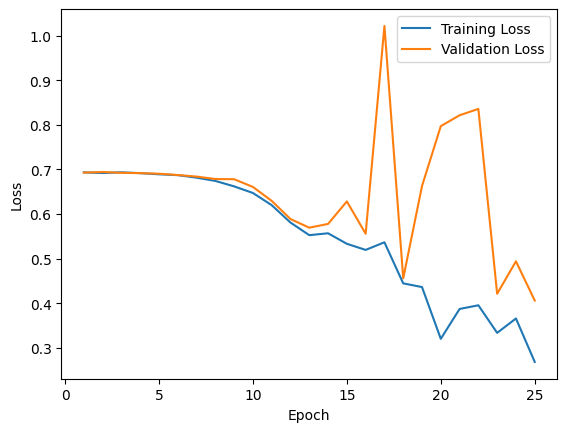

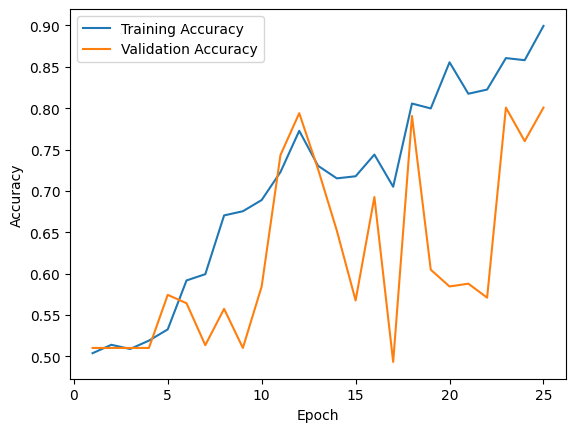

In [15]:
# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 7. Evaluate the Model's Performance

### Improve Model's Performance and Prevent Overfitting 

Neural networks can be prone to overfitting. Notice that the training accuracy is 100% but the validation accuracy is around 80%. This indicates that our model is overfitting; it will not perform as well on new, previously unseen data as it did during training. We want to have an accurate idea of how well our model will generalize to new data. Our goal is to have our training and validation accuracy scores be as close as possible.

While there are different techniques that can be used to prevent overfitting, for the purpose of this exercise we will focus on two methods:

1. Changing the number of epochs. Too many epochs can lead to overfitting of the training dataset, whereas too few epochs may result in underfitting.

2. Adding dropout regularization. During training, the nodes of a particular layer may always become influenced only by the output of a particular node in the previous layer, causing overfitting. Dropout regularization is a technique that randomly drops a number of nodes in a neural network during training as a way of adding randomization and preventing nodes from becoming dependent on one another. Adding dropout regularization can reduce overfitting and also improve the performance of the model. 

<b>Task:</b> 

1. Tweak the variable `num_epochs` above and restart and rerun all of the cells above. Evaluate the performance of the model on the training data and the validation data.

2. Add Keras `Dropout` layers after one or all hidden layers. Add the following line of code after you add a hidden layer to your model object:  `nn_model.add(keras.layers.Dropout(.25))`. The parameter `.25` is the fraction of the nodes to drop. You can experiment with this value as well. Restart and rerun all of the cells above. Evaluate the performance of the model on the training data and the validation data.


<b>Analysis:</b> 
In the cell below, specify the different approaches you used to reduce overfitting and summarize which configuration led to the best generalization performance.

Did changing the number of epochs prevent overfitting? Which value of `num_epochs` yielded the closest training and validation accuracy score? 

Did adding dropout layers prevent overfitting? How so? Did it also improve the accuracy score when evaluating the validation data? How many dropout layers did you add and which fraction of nodes did you drop? 

Record your findings in the cell below.

<Double click this Markdown cell to make it editable, and record your findings here.>

First, I noticed that a num_epochs of 55 yielded a validation accuracy of 0.8108 and a training accuracy of 1.00, producing a difference of 0.1892. I decided to lower the number of epochs to 25. This yielded a training accuracy of 0.9459 and a validation accuracy of 0.8041, which is a difference of 0.1418, which is less than the difference for 55 epochs. Then I decided to try values of 15, 20, 30, and 35, yielding differences of 0.366 with an validation accuracy of only 0.6216, 0.230 with an accuracy of 0.8108, 0.1757 with an accuracy of 0.8243, and 0.1993 with an accuracy of 0.8007.

Additionaly, I decided to try increasing the number of epochs to 60, 65, and 70, which yielded validation accuracies of 0.8176, 0.8108, and 0.8108. These three epoch values all had training accuracy of 1.00, so 60 epochs had the least difference between training accuracy and validation accuracy, because it had the highest validation accuracy of 0.8176. This difference was 0.1824.

Overall, yes, changing the number of epochs did prevent overfitting. A value of 25 epochs produced the closest training and validation accuracy scores, with a difference of only 0.1418 and a validation accuracy of 0.8041. However, a value of 30 epochs produced a validation accuracy of 0.8243 with a difference of 0.1757. Therefore, 30 produces the highest validation accuracy, while 25 produced the least variation, and the differences and validation accuracy differ by less than 0.03. 

Next, I held the number of epochs at 25 and began experimenting with dropout, first adding one layer with 25% dropout. This produced a difference of 0.0564 with an accuracy of 0.7635. I noticed that 20 epochs had a higher accuracy, so I then decided to test one layer of 25% dropout with 20 epochs, which greatly reduced the training accuracy and validation accuracy and increased the difference. Next, I tried adding another layer of dropout with 25% dropped neurons, once again with 25 epochs. This produced a difference of 0.1012. I then went back to only one layer of dropout and increased it to 35%, producing a difference of 0.1147. Finally, I tried one dropout layer with 15% dropout, resulting in a difference of 0.22.


Thus, overall, adding dropout did reduce overfitting, as almost all of the differences produced using dropout were less than those produced when not using dropout. Further, for the optimal configuration using dropout, the difference was 0.0854 less than the optimal configuration without droupout. However, adding dropout layers significantly decreased the accuracy from a high of 0.8243 to 0.7635. I used 25 epochs and one dropout layer of 25%, which produced the model with the best generalization, as the difference between its training accuracy and validation accuracy was only 0.0564. I determind that this is the optimal model configuration.

### Evaluate the Performance on the Test Set

Now that you have improved the model, let's evaluate its performance on our test data and compare the results.

<b>Task:</b> In the code cell below, call the  `evaluate()` method on the model object `nn_model`. Specify `X_test_tfidf` and `y_test` as arguments. You must convert `X_test_tfidf` to a NumPy array using the `toarray()` method. 

Note: The `evaluate()` method returns a list containing two values. The first value is the loss and the second value is the accuracy score.


In [16]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)# YOUR CODE HERE

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

16/16 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8178
Loss:  0.39911848306655884 Accuracy:  0.8178137540817261


### Make Predictions on the Test Set

Now that we have our best performing model that can generalize to new, previously unseen data, let us make predictions using our test data.

In the cell below, we will make a prediction on our test set and receive probability predictions for every example in the test set (these values will be between 0.0 and 1.0). We will then inspect the results for the first 20 examples &mdash; We will apply a threshold to determine the predicted class for every example; we will use a threshold of 0.5. This means that if the probability is greater than 0.5, we will assume the book review is good. We will then print the actual class labels contained in `y_test` to see if our model is producing accurate predictions.

<b>Task: </b> In the code cell below, do the following:

1. Call the  `predict()` method on the model object `nn_model`. Specify `X_test_tfidf` as an argument. You must convert `X_test_tfidf` to a NumPy array using the `toarray()` method. Save the results to the array `probability_predictions`.
2. Loop through the first 20 items in `probability_predictions`. These correspond to the predicted probabilities for the first 20 examples in our test set. For every item, check if the probability is greater than 0.5. If so, output:
* the probability value in `probability_predictions`
* the corresponding label in `y_test`. Note: convert the series `y_test` using `y_test.to_numpy()` before indexing into it.

Inspect the results. How is our model performing? Is our model properly predicting whether the book reviews are good or bad reviews?

In [17]:
# Make predictions on the test set
probability_predictions = nn_model.predict(X_test_tfidf.toarray())# YOUR CODE HERE

print("Predictions for the first 20 examples:")
# YOUR CODE HERE
for i in range(len(probability_predictions[:20])):
    if probability_predictions[i] > 0.5:
        print('output:', probability_predictions[i])
        print('corresponding label:', y_test.to_numpy()[i])
    

Predictions for the first 20 examples:
output: [0.73773706]
corresponding label: False
output: [0.73216534]
corresponding label: True
output: [0.7419206]
corresponding label: True
output: [0.94376266]
corresponding label: True
output: [0.8290302]
corresponding label: True
output: [0.7107368]
corresponding label: True
output: [0.77136016]
corresponding label: True
output: [0.7410689]
corresponding label: True
output: [0.5910786]
corresponding label: True
output: [0.5596181]
corresponding label: True


Let's check a few of the original book review texts to get a further glimpse into how our model is performing.

In [18]:
print('Review #1:\n')

print(X_test.to_numpy()[11])

goodReview = True if probability_predictions[11] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[11]))

Review #1:

Thriller and mystery readers like to guess along with our protagonists when we're reading a story.  We like to look for clues in what we've read to help us unravel the plot, and find out who did it and why the crime was done.

John Grisham cheats us out of that fun.  The villian of this book isn't introduced until there less than 75 pages left, which means that when you get that far, you realize that everything you read before then wasn't valid. To have some red herrings in a thriller is fine, but to have 300 pages of chases and red herrings?  That's bad.

Read another thriller instead of this one, one that plays by the rules


Prediction: Is this a good review? False

Actual: Is this a good review? False



In [19]:
print('Review #2:\n')

print(X_test.to_numpy()[24])

goodReview = True if probability_predictions[24] >= .5 else False

print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[24]))

Review #2:

I have read Baldacci's first four novels and have immensely enjoyed all of them.  This one, however, is just awful.  Not only the character's dialogue but even the story itself is written like a really bad detective movie.  The only thing I can think of to compare it to is this :  There was a series of Calvin and Hobbes cartoons where Calvin imagines himself as a private detective and they are written like the old detective shows, with lame lines like "The gun was loaded, and so was I".  That is exactly what this book is like, except it goes on for 400 pages.  There isn't a single interesting character in this book, in my opinion.  You just have to slog your way through the book to get to the end.  It's the Bataan Death March of novels.  I hope this is an aberration - I'll certainly give him another try since the first four novels that I read were so good.  But one more stinker like this one and I'll drop his name from my reading list


Prediction: Is this a good review? Fa

In [20]:
print('Review #3:\n')

print(X_test.to_numpy()[56])

goodReview = True if probability_predictions[56] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[56]))

Review #3:

This commentary has many tremendous insights into the book of Romans.  Romans is one of the richest resources of truth within the Bible and John Stoot does a good job of unpacking it.  The book is written from a framework of the reader having a strong prior understanding of the Scriptures.  It is probably not considered a highly scholarly work, but it is not for the average reader to pick up for light reading either


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [21]:
print('Review #4:\n')
print(X_test.to_numpy()[102])

goodReview = True if probability_predictions[102] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[102]))

Review #4:

With astute attention to the details of character, setting and daily life, Susan Kelly illuminates the ordinary. Pondering love, memory, faith,and responsiblity, Kelly transforms the everyday into the quintessential. This is a beautifully rendered story


Prediction: Is this a good review? True

Actual: Is this a good review? True



## Part 8: Analysis

Experiment with the vectorizer and neural network implementation above and compare your results every time you train the network. Pay attention to the time it takes to train the network, and the resulting loss and accuracy on both the training and test data. 

Below are some ideas for things you can try:

* Adjust the learning rate.
* Add more hidden layers and/or experiment with different values for the `unit` parameter in the hidden layers to change the number of nodes in the hidden layers.
* Fit your vectorizer using different document frequency values and different n-gram ranges. When creating a `TfidfVectorizer` object, use the parameter `min_df` to specify the minimum 'document frequency' and use `ngram_range=(1,2)` to change the default n-gram range of `(1,1)`.

Record your findings in the cell below.


<Double click this Markdown cell to make it editable, and record your findings here.>

First, I decided to decrease the learning rate to 0.05. This decreased both the training and testing accuracies to 0.72 from around 0.81.
Then, I decided to return the learning rate to 0.01 and to change the min_df to 2 and the ngram_range = (1, 2). This improved both the training and testing accuracies, with the testing accuracy increasing to 0.8238 and the time was only 5 seconds.
Next, I decided to add another hidden layer with 128 nodes as the first layer, initially with no drop out. This decreased both the training and testing accuracy to around 0.7186 and took 6.82s.
Finaly, I decided to remove the hidden layer of 128 nodes and try chaning min_df to 3, which resulted in a training accuracy of 0.89, a valdidation accuracy of 0.80, and a test accuracy of 0.8178.
Therefore, overall the optimal configuration is a neural network with 3 hidden layers, the first with a 25% dropout rate, 25 epochs, a learning rate of 0.1, and a vectorizer with a min_df of 2 and ngram_range of (1, 2). 